In [1]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

rallyname = 'Foligno'
raceDate = '10/03/2024'
surface = 'Gravel'
competition = 'Italy'

link = 'https://www.ewrc-results.com/results/86703-rally-citta-di-foligno-2024/?s='
startat, no_ss=453794, int(9)

canceled = []


stages = [number for number in range(no_ss)]

rally_23 = []

/home/ilias/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
if canceled:
    for j in canceled: stages.remove(j-1)

In [3]:
for ss in stages:
    val= startat + ss
    ss_a = str(val)
    
    my_url11 = link + ss_a
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

/tmp/ipykernel_5716/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5716/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5716/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')
/tmp/ipykernel_5716/3138041723.py:15: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  data['Pos.'] = data['Pos.'].replace('=', method='ffill')


In [4]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [5]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages['Gr/Cl'] = rally2023_stages['Gr/Cl'].str[-6:]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#6,Battistolli A.,Rally2,8:48.1,-,82.8,1,Foligno,10/03/2024,Gravel,Italy,1
1,2,#9,Heikkilä Mikko,Rally2,8:48.5,+0.4 + 0.4,82.7 0.03,1,Foligno,10/03/2024,Gravel,Italy,2
2,3,#1,Ciuffi Tommaso,Rally2,8:57.4,+9.3 + 8.9,81.3 0.77,1,Foligno,10/03/2024,Gravel,Italy,3
3,4,#11,Scandola Umber,Rally2,9:07.6,+19.5 + 10.2,79.8 1.61,1,Foligno,10/03/2024,Gravel,Italy,4
4,5,#18,Tali Nicola -,Rally2,9:18.9,+30.8 + 11.3,78.2 2.54,1,Foligno,10/03/2024,Gravel,Italy,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47,48,#85,Stoppioni Save,ver 55,6:46.2,+1:47.8 + 9.2,55.6 17.2,9,Foligno,10/03/2024,Gravel,Italy,48
48,49,#86,Bentivogli Gia,der 25,6:48.3,+1:49.9 + 2.1,55.3 17.5,9,Foligno,10/03/2024,Gravel,Italy,49
49,50,#87,Olevano Alessa,ver 55,7:27.2,+2:28.8 + 38.9,50.5 23.7,9,Foligno,10/03/2024,Gravel,Italy,50
50,51,#89,Robone Andrea,A0,9:17.3,+4:18.9 + 1:50.1,40.5 41.3,9,Foligno,10/03/2024,Gravel,Italy,51


In [6]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [7]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [8]:
pd.set_option("display.max_columns", None)

#dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.png'))
dfi.export(rally2023_TimeView,'testtt.png')

CalledProcessError: Command '['--enable-logging', '--disable-gpu', '--headless', '--crash-dumps-dir=/home/ilias/.dataframe_image/tmpxoeli0db', '--force-device-scale-factor=1', '--window-size=1400,900', '--hide-scrollbars', '--screenshot=/home/ilias/.dataframe_image/tmpxoeli0db/temp.png', '/home/ilias/.dataframe_image/tmpxoeli0db/temp.html']' returned non-zero exit status 64.

In [7]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv('../' + str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Battistolli A.,Rally2,1,Foligno,10/03/2024,Gravel,Italy,1,528.1
1,Heikkilä Mikko,Rally2,1,Foligno,10/03/2024,Gravel,Italy,2,528.5
2,Ciuffi Tommaso,Rally2,1,Foligno,10/03/2024,Gravel,Italy,3,537.4
3,Scandola Umber,Rally2,1,Foligno,10/03/2024,Gravel,Italy,4,547.6
4,Tali Nicola -,Rally2,1,Foligno,10/03/2024,Gravel,Italy,5,558.9
...,...,...,...,...,...,...,...,...,...
47,Stoppioni Save,ver 55,9,Foligno,10/03/2024,Gravel,Italy,48,406.2
48,Bentivogli Gia,der 25,9,Foligno,10/03/2024,Gravel,Italy,49,408.3
49,Olevano Alessa,ver 55,9,Foligno,10/03/2024,Gravel,Italy,50,447.2
50,Robone Andrea,A0,9,Foligno,10/03/2024,Gravel,Italy,51,557.3


In [8]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
min_value_G = rally2023_stages.groupby(['Race', 'ss', 'Gr/Cl'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)
min_value2_G =  pd.DataFrame(min_value_G)

min_value2_G = min_value2_G.rename(columns={'time_SS_sec' : 'min_time_Gr'})
min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2_G

min_time_Gr
Race    ss Gr/Cl              
Foligno 1  6 Plus        682.1
           A0            855.4
           Female        588.4
           N2            725.3
           N4            634.2
...                        ...
        9  Rally4        329.9
           Rally5        356.2
           der 25        308.6
           ly4/R2        366.2
           ver 55        314.5

[119 rows x 1 columns]

In [9]:
ss_times_F_G = rally2023_stages.merge(min_value2_G, on=['Race', 'ss', 'Gr/Cl'])
ss_times_F = ss_times_F_G.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff_G']=ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr']
ss_times_F['diff_G%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time_Gr'])/ss_times_F['min_time_Gr']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time_Gr,min_time,diff,diff_G,diff_G%,SS.
0,Battistolli A.,Rally2,1,Foligno,10/03/2024,Gravel,Italy,1,528.1,528.1,528.1,0.0,0.0,0.000000,01
1,Heikkilä Mikko,Rally2,1,Foligno,10/03/2024,Gravel,Italy,2,528.5,528.1,528.1,0.4,0.4,0.075743,01
2,Ciuffi Tommaso,Rally2,1,Foligno,10/03/2024,Gravel,Italy,3,537.4,528.1,528.1,9.3,9.3,1.761030,01
3,Scandola Umber,Rally2,1,Foligno,10/03/2024,Gravel,Italy,4,547.6,528.1,528.1,19.5,19.5,3.692482,01
4,Tali Nicola -,Rally2,1,Foligno,10/03/2024,Gravel,Italy,5,558.9,528.1,528.1,30.8,30.8,5.832229,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Leonessi Marco,ly4/R2,9,Foligno,10/03/2024,Gravel,Italy,42,366.2,366.2,298.4,67.8,0.0,0.000000,09
510,Piccardo Andre,ly4/R2,9,Foligno,10/03/2024,Gravel,Italy,43,377.8,366.2,298.4,79.4,11.6,3.167668,09
511,Gherardi Chris,ly4/R2,9,Foligno,10/03/2024,Gravel,Italy,47,397.0,366.2,298.4,98.6,30.8,8.410705,09
512,Scalzotto Andr,6 Plus,9,Foligno,10/03/2024,Gravel,Italy,45,394.6,394.6,298.4,96.2,0.0,0.000000,09


In [10]:
Group = 'Rally4'
#ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains(Group)]
ss_times_WRC = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['Rally4',]))]
ss_times_WRC.to_csv('compare' + str(rallyname) + str(Group) + '.csv')
#ss_times_WRC.to_csv(str(rallyname) +'.csv')

In [11]:
ss_times_F3 =ss_times_WRC.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
#ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['Race', 'SS.'])
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff_G', index='Crew', columns=['SS.'])
ss_times_F4

SS.,01,02,03,04,05,06,07,08,09
Crew,,,,,,,,,
Bartolini Davi,32.8,14.7,7.6,24.8,12.0,13.5,26.9,17.3,12.4
Biondi Sergio,56.6,30.3,21.8,47.3,35.2,18.9,69.4,21.0,13.2
Cazzaro Nicola,35.5,12.4,6.9,22.3,7.4,6.7,20.0,8.8,12.5
Diserò Luca -,30.2,16.0,10.6,28.5,12.8,15.8,48.7,25.3,17.5
Farina Fabio,12.8,4.1,0.0,2.7,NaN,NaN,NaN,NaN,NaN
Leuratti Giorg,73.2,30.4,25.7,35.6,15.1,16.1,96.9,12.4,26.7
Marchioro Nico,22.6,16.1,7.4,15.1,8.1,12.5,0.0,0.0,0.0
Marrone Stefan,20.7,10.6,10.9,31.3,19.3,19.5,45.2,31.1,9.9
Pierulivo Leon,66.0,28.2,21.1,55.9,29.1,22.6,93.9,29.4,21.5


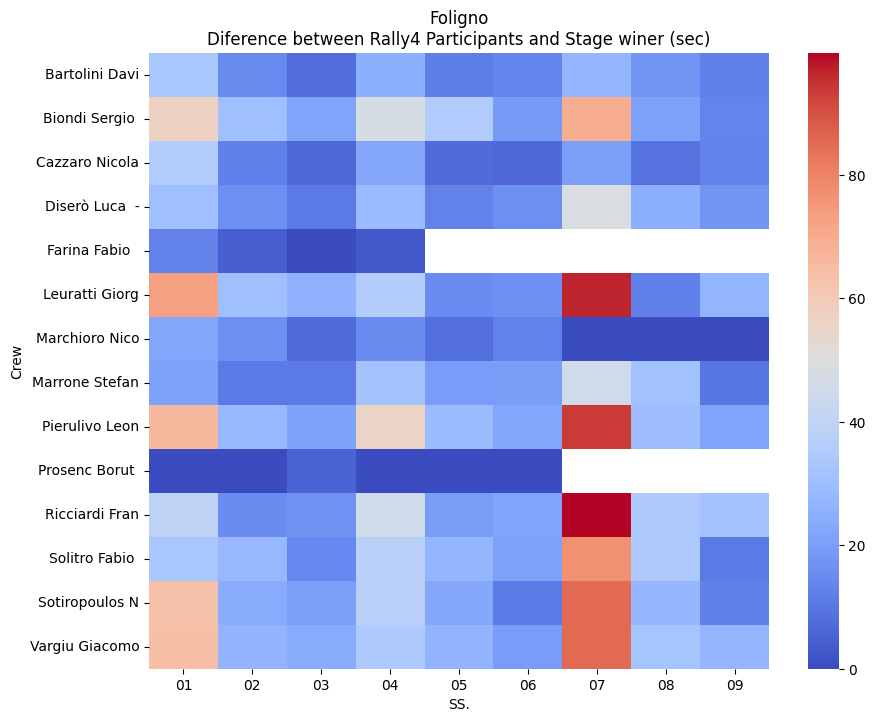

In [12]:
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between Rally4 Participants and Stage winer (sec)')
plt.savefig(str(rallyname) + "Heatmap_.png")
plt.show()

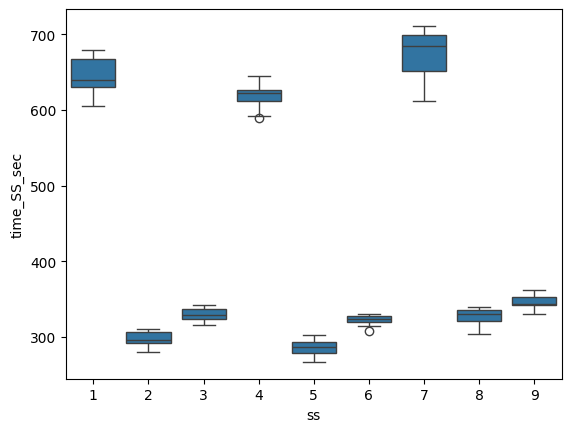

In [13]:
bplt=sns.boxplot( y=ss_times_WRC["time_SS_sec"], x=ss_times_WRC["ss"])
plt.savefig(str(rallyname) + "Boxplot_Rally4.png")

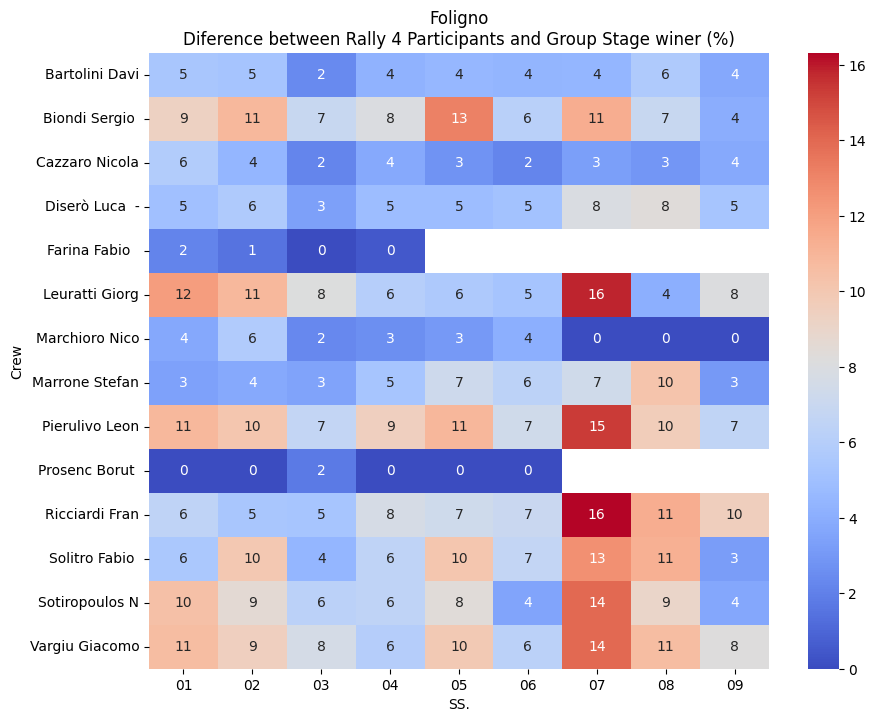

In [14]:
#ss_times_F3
fig,ax = plt.subplots()
fig.set_size_inches(10,8)
ss_timesa = pd.pivot_table(ss_times_F3, values='diff_G%', index='Crew', columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between Rally 4 Participants and Group Stage winer (%)')
plt.savefig(rallyname + " Rally4.jpg")
plt.show()